



<img src="./Images/Hack.png" alt="HackaThon" height="1000" width="1000"/>

## *Test case* : _Object Detection in the Image and Identify the postion of detected Objects with Voice Feedback_

![A robot identifying fruit](./Images/object-detection.jpg)


In [1]:
import numpy as np
import argparse
import time
import cv2
import os
import matplotlib.pyplot as plt
import speech_recognition as sr
from gtts import gTTS

In [2]:
labelsPath = os.path.sep.join(["coco.names"])
LABELS = open(labelsPath).read().strip().split("\n")


In [3]:
print(LABELS)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [4]:
print(LABELS[0])

person


In [5]:
np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3),dtype="uint8")

In [6]:
weightsPath = 'yolov3.weights'
configPath = 'yolov3.cfg'


In [7]:
print(weightsPath)

yolov3.weights


In [8]:
configPath

'yolov3.cfg'

In [9]:
print("[INFO] loading YOLO from disk...")
net = cv2.dnn.readNetFromDarknet(configPath, weightsPath)

[INFO] loading YOLO from disk...


In [10]:
image = cv2.imread('test1.jpg')
(H, W) = image.shape[:2]

In [11]:
(H, W)

(163, 310)

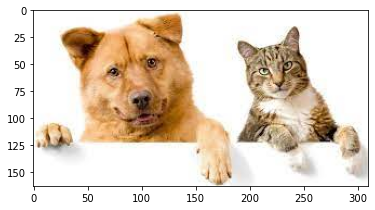

In [12]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [13]:
ln = net.getLayerNames()
ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]


In [14]:
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416),swapRB=True, crop=False)
net.setInput(blob)
start = time.time()
layerOutputs = net.forward(ln)
end = time.time()

In [15]:

print("[INFO] YOLO took {:.6f} seconds".format(end - start))

[INFO] YOLO took 1.081586 seconds


In [16]:
boxes = []
confidences = []
centers = []
classIDs = []
ID = 0
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

In [17]:


for output in layerOutputs:

	for detection in output:

		scores = detection[5:]
		classID = np.argmax(scores)
		confidence = scores[classID]


		if confidence > 0.5:

			box = detection[0:4] * np.array([W, H, W, H])
			(centerX, centerY, width, height) = box.astype("int")




			x = int(centerX - (width / 2))
			y = int(centerY - (height / 2))


			boxes.append([x, y, int(width), int(height)])
			confidences.append(float(confidence))
            
			classIDs.append(classID)
			centers.append((centerX, centerY))
            
x = classIDs

#print(LABELS[classIDs[2]], confidences[2])

idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.5 ,0.3)


if len(idxs) > 0:
	list1 = []
	for i in idxs.flatten():

		(x, y) = (boxes[i][0], boxes[i][1])
		(w, h) = (boxes[i][2], boxes[i][3])
        
#		centerX, centerY = centers[i][0], centers[i][1]
		centerX = round((2*x + w)/2)
		centerY = round((2*y + h)/2)
		if centerX <= W/3:
			W_pos = "left "
		elif centerX <= (W/3 * 2):
			W_pos = "center "
		else:
			W_pos = "right "

		if centerY <= H/3:
			H_pos = "top "
		elif centerY <= (H/3 * 2):
			H_pos = "mid "
		else:
			H_pos = "bottom "
            
        
		list1.append(H_pos + W_pos + LABELS[classIDs[i]])
        
		print('\n***************** object in image is Detected..... *****************\n')
        
		print(LABELS[classIDs[i]], confidences[i])
        

        
#	plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

	description = ', '.join(list1)
    
	print('\n***************** Detected Object Position in image are .... *****************\n')

	myobj = gTTS(text=description, lang="en", slow=False)
    
	print('"{}"'.format(description))
    
	print('\n***************** Text To Speech Conversion.... *****************\n')
    
	myobj.save("object_detection.mp3")
    
	print('----------------------- Done :) -------------------------------')
    
os.system('start object_detection.mp3')


***************** object in image is Detected..... *****************

cat 0.996505618095398

***************** object in image is Detected..... *****************

dog 0.9930397272109985

***************** Detected Object Position in image are .... *****************

"mid right cat, mid left dog"

***************** Text To Speech Conversion.... *****************

----------------------- Done :) -------------------------------


0

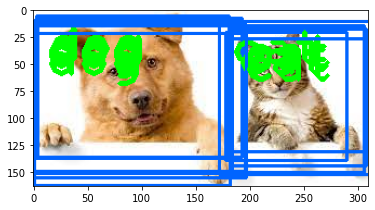

In [18]:
	classIDs_1 = np.array(classIDs)
	confidences_1 = np.array(confidences)
	for ClassInd, conf , bbox in zip(classIDs_1.flatten(), confidences_1.flatten(), boxes):
		cv2.rectangle(image,bbox,(255, 100, 0), 2)
		cv2.putText(image,LABELS[ClassInd],(bbox[0]+10,bbox[1]+40), font, fontScale=font_scale,color=(0,255,0), thickness =3 )
        
	plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))